# Variáveis Aleatórias e Suas Distribuições

In [1]:
import numpy as np                      # Para operações numéricas
import pandas as pd                     # Para manipulação de dados
from scipy.stats import norm, expon     # Importação das distribuições normal e exponencial

import matplotlib.pyplot as plt                 # Para a criação de gráficos
from matplotlib_inline import backend_inline    # Para configurar a saída dos gráficos

# Configuração para que os gráficos sejam exibidos no formato SVG
backend_inline.set_matplotlib_formats("svg")

# Atualização das configurações padrão do matplotlib para melhorar a estética dos gráficos
plt.rcParams.update({
    "xtick.top": True,              # Ativa os ticks superiores no eixo X
    "ytick.right": True,            # Ativa os ticks à direita no eixo Y
    "xtick.direction": "in",        # Define a direção dos ticks do eixo X para dentro
    "ytick.direction": "in",        # Define a direção dos ticks do eixo Y para dentro
    "font.size": 12,                # Define o tamanho da fonte
    "font.family": "Lato",          # Define a família da fonte
    "axes.labelsize": 12,           # Define o tamanho da fonte dos rótulos dos eixos
    "axes.titlesize": 12,           # Define o tamanho da fonte dos títulos dos gráficos
    "legend.fontsize": 10,          # Define o tamanho da fonte das legendas
    "xtick.labelsize": 10,          # Define o tamanho da fonte dos labels no eixo X
    "ytick.labelsize": 10,          # Define o tamanho da fonte dos labels no eixo Y
    "xtick.minor.visible": True,    # Torna visíveis os ticks menores no eixo X
    "ytick.minor.visible": True     # Torna visíveis os ticks menores no eixo Y
})

- [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

- [`scipy.stats.expon`](https://scipy.github.io/devdocs/reference/generated/scipy.stats.expon.html#scipy.stats.expon)

## Variáveis Aleatórias

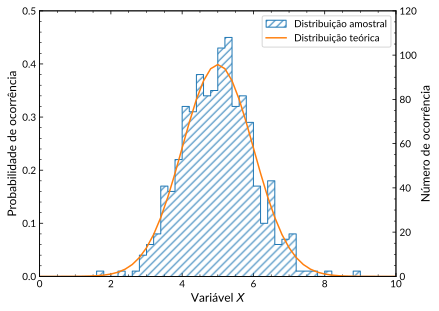

In [2]:
# Define a semente do gerador de números aleatórios para garantir a reprodutibilidade
np.random.seed(42) 

N: int = 500            # Número de amostras
mu: int = 5             # Média da distribuição normal
sigma: float = 1.0      # Desvio padrão da distribuição normal

# Geração de amostras a partir de uma distribuição normal com média 'mu' e desvio padrão 'sigma'
amostra: np.ndarray = np.random.normal(loc=mu, scale=sigma, size=N) 

# Criação de bins para o histograma com um intervalo de 0.2 entre cada ponto
bins: np.ndarray = np.linspace(0, 10, 51)    

# Cálculo da distribuição teórica normal para o conjunto de bins
dist_teorica: np.ndarray = norm.pdf(bins, loc=mu, scale=sigma)

# Criação de um subplot para os gráficos
_, ax = plt.subplots()

# Plotagem do histograma das amostras
ax.hist(amostra, bins=bins, hatch="///", histtype="step", 
        density=True, label="Distribuição amostral")

# Plotagem da distribuição teórica
ax.plot(bins, dist_teorica, label="Distribuição teórica")

# Configuração dos rótulos dos eixos e limites do gráfico principal
ax.set(xlabel="Variável $X$", ylabel="Probabilidade de ocorrência")
ax.axis([0, 10, 0, 0.5])
ax.legend()

# Criação de um eixo secundário que compartilha o mesmo eixo X
ax2 = ax.twinx()
ax2.hist(amostra, bins=bins, alpha=0)  # Histograma transparente para alinhamento do eixo Y

# Configuração dos rótulos e limites do eixo Y secundário
ax2.set(ylabel="Número de ocorrência")
ax2.axis([0, 10, 0, 120])

# Salvamento da figura em PDF com ajustes para evitar cortes no layout
plt.savefig("../../tex-statistics/Figuras/2-1.pdf", bbox_inches="tight");

## Funções de Distribuição de Probabilidade

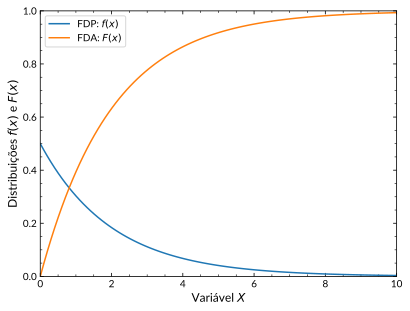

In [3]:
lambda_: float = 0.5                        # Taxa da distribuição exponencial
x: np.ndarray = np.linspace(0, 10, 100)     # Definição do intervalo de valores para 'x'

# Cálculo da Função Densidade de Probabilidade (FDP) para a distribuição exponencial
fdp: np.ndarray = expon.pdf(x, scale=1/lambda_)

# Cálculo da Função de Distribuição Acumulada (FDA) para a distribuição exponencial
fda: np.ndarray = expon.cdf(x, scale=1/lambda_)

# Criação de um gráfico para plotar as funções FDP e FDA
_, ax = plt.subplots()
ax.plot(x, fdp, label="FDP: $f(x)$")  # Plotagem da FDP
ax.plot(x, fda, label="FDA: $F(x)$")  # Plotagem da FDA

# Configuração dos rótulos dos eixos e limites do gráfico
ax.set(xlabel="Variável $X$", ylabel="Distribuições $f(x)$ e $F(x)$")
ax.legend(loc="upper left")     # Posicionamento da legenda
ax.axis([0, 10, 0, 1])          # Definição dos limites dos eixos

plt.savefig("../../tex-statistics/Figuras/2-2.pdf", bbox_inches="tight");

---
## Resolução do Problema 2.3.

In [4]:
# Leitura dos dados
tubos = [pd.read_csv("../../data/statistics/thomson1.dat"),
            pd.read_csv("../../data/statistics/thomson2.dat")]

for idx, tubo in enumerate(tubos, start=1):
    print(f"## Tubo {idx}")

    # Extração das séries para análise
    wq = tubo["w/q"]
    I = tubo["I"]

    # Cálculo das estatísticas
    print(f"Média de W/Q: {round(wq.mean(), 2)}")
    print(f"Variância de W/Q: {round(wq.var(), 2)}")
    print(f"Média de I: {round(I.mean(), 2)}")
    print(f"Variância de I: {round(I.var(), 2)}")
    print(f"Covariância entre W/Q e I: {round(np.cov(wq, I)[0, 1], 2)}")
    print(f"Coeficiente de correlação entre W/Q e I: {round(np.corrcoef(wq, I)[0, 1], 2)}\n")

## Tubo 1
Média de W/Q: 13.28
Variância de W/Q: 71.51
Média de I: 312.92
Variância de I: 8715.72
Covariância entre W/Q e I: 759.12
Coeficiente de correlação entre W/Q e I: 0.96

## Tubo 2
Média de W/Q: 2.92
Variância de W/Q: 0.67
Média de I: 174.27
Variância de I: 286.22
Covariância entre W/Q e I: 13.15
Coeficiente de correlação entre W/Q e I: 0.95



## Resolução do Problema 2.4.

In [5]:
# Concatenando os dois dataframes anteriores
tubos = pd.concat(tubos)
gases = ["ar", "hidrogênio", "ácido carbônico"]

for gas in gases:
    print(f"## {gas.upper()}")

    # Filtrando o dataframe pelo tipo de gás
    tubo_gas = tubos[tubos["gas"] == gas]
    me = tubo_gas["m/e"]

    # Cálculo das estatísticas
    print(f"Quantidade: {len(me)}")
    print(f"Média de m/e: {round(me.mean(), 2)}")
    print(f"Desvio Padrão de m/e: {round(me.std(), 2)}\n")

## AR
Quantidade: 14
Média de m/e: 0.47
Desvio Padrão de m/e: 0.09

## HIDROGÊNIO
Quantidade: 5
Média de m/e: 0.47
Desvio Padrão de m/e: 0.08

## ÁCIDO CARBÔNICO
Quantidade: 4
Média de m/e: 0.43
Desvio Padrão de m/e: 0.07



## Resolução do Problema 2.5.

In [9]:
# Dados representando pares de valores (x, y)
dados: np.ndarray = np.array([(0, 2), (2, 5), (1, 4), (3, 1)])

# Extração dos valores de x e y dos dados
x: np.ndarray = dados[:, 0]  
y: np.ndarray = dados[:, 1]  

# Cálculo da covariância amostral entre x e y
covariancia_amostral: float = np.cov(x, y)[0, 1] 
print("Covariância amostral:", round(covariancia_amostral, 2))

# Cálculo do coeficiente de correlação amostral entre x e y
correlacao_amostral: float = np.corrcoef(x, y)[0, 1]
print("Correlação amostral:", round(correlacao_amostral, 2))

Covariância amostral: -0.33
Correlação amostral: -0.14
